In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train[0].shape

(28, 28)

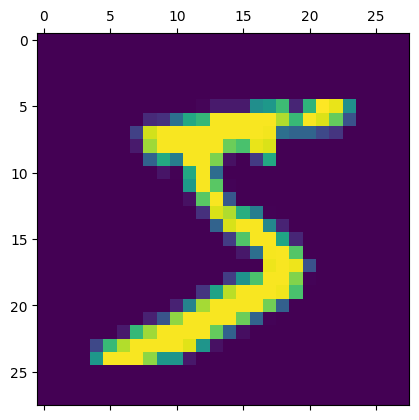

In [5]:
plt.matshow(X_train[0])

In [6]:
y_train[0]

5

In [7]:
#normalizing

X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train[:5]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

In [9]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [10]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [11]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [12]:
import tensorflow as tf

In [13]:
y_train.shape

(60000,)

In [14]:
from tensorflow.keras import datasets, layers, models

CNN = keras.Sequential([
    layers.Conv2D(filters=30, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
CNN.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.9001 - loss: 0.3286
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9825 - loss: 0.0565
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 19ms/step - accuracy: 0.9898 - loss: 0.0346
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9929 - loss: 0.0245
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9947 - loss: 0.0170


In [17]:
CNN.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9833 - loss: 0.0532


[0.04511645436286926, 0.9858999848365784]

In [21]:
y_pred = CNN.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[7.96584599e-03, 4.78952438e-01, 3.19544584e-01, 9.90297794e-01,
        1.99368428e-02, 6.68103108e-03, 2.16021220e-07, 9.99999762e-01,
        4.53591049e-02, 2.43556634e-01],
       [9.96501088e-01, 9.99851108e-01, 1.00000000e+00, 1.30737811e-01,
        1.12400926e-06, 1.37724169e-03, 7.52745688e-01, 1.08615111e-03,
        8.06948841e-02, 6.96408078e-02],
       [1.92240581e-01, 9.99996006e-01, 7.01137930e-02, 2.90380185e-03,
        5.75934291e-01, 3.22495960e-02, 2.37731468e-02, 6.59098923e-01,
        9.11224037e-02, 1.04201406e-01],
       [9.99999762e-01, 2.82747466e-02, 5.79325914e-01, 2.84144626e-04,
        9.03021719e-05, 5.12755215e-01, 9.14818883e-01, 2.81581040e-02,
        1.86656751e-02, 1.51882604e-01],
       [1.25670596e-03, 6.74595088e-02, 1.83108207e-02, 4.30743024e-03,
        9.99999285e-01, 5.96622122e-04, 3.87117825e-02, 2.65925890e-04,
        4.81529474e-01, 7.42459178e-01]], dtype=float32)

In [18]:
y_test[:5]   #actual

array([7, 2, 1, 0, 4], dtype=uint8)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]   #argmax will return the max element index...Ex: [45,97,12]..argmax will return 1..as 97 is highest.
y_classes[:5] #predicted

[7, 2, 1, 0, 4]